In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Collecting the data

In [2]:
#Loading the dataset
df=pd.read_csv("world_population.csv")
#Checking the first 5 rows of the dataset
df.head(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [3]:
#Checking the last 5 rows of the dataset
df.tail(5)

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
229,226,WLF,Wallis and Futuna,Mata-Utu,Oceania,11572,11655,12182,13142,14723,13454,11315,9377,142,81.4930,0.9953,0.00
230,172,ESH,Western Sahara,El Aaiún,Africa,575986,556048,491824,413296,270375,178529,116775,76371,266000,2.1654,1.0184,0.01
231,46,YEM,Yemen,Sanaa,Asia,33696614,32284046,28516545,24743946,18628700,13375121,9204938,6843607,527968,63.8232,1.0217,0.42
232,63,ZMB,Zambia,Lusaka,Africa,20017675,18927715,16248230,13792086,9891136,7686401,5720438,4281671,752612,26.5976,1.0280,0.25
233,74,ZWE,Zimbabwe,Harare,Africa,16320537,15669666,14154937,12839771,11834676,10113893,7049926,5202918,390757,41.7665,1.0204,0.20


In [4]:
#Checking the name of the columns
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')

In [5]:
#Checking datatypes of each column
df.dtypes

Rank                             int64
CCA3                            object
Country/Territory               object
Capital                         object
Continent                       object
2022 Population                  int64
2020 Population                  int64
2015 Population                  int64
2010 Population                  int64
2000 Population                  int64
1990 Population                  int64
1980 Population                  int64
1970 Population                  int64
Area (km²)                       int64
Density (per km²)              float64
Growth Rate                    float64
World Population Percentage    float64
dtype: object

In [6]:
#checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rank                         234 non-null    int64  
 1   CCA3                         234 non-null    object 
 2   Country/Territory            234 non-null    object 
 3   Capital                      234 non-null    object 
 4   Continent                    234 non-null    object 
 5   2022 Population              234 non-null    int64  
 6   2020 Population              234 non-null    int64  
 7   2015 Population              234 non-null    int64  
 8   2010 Population              234 non-null    int64  
 9   2000 Population              234 non-null    int64  
 10  1990 Population              234 non-null    int64  
 11  1980 Population              234 non-null    int64  
 12  1970 Population              234 non-null    int64  
 13  Area (km²)          

In [7]:
#summarising numerical columns
df.describe()

,Rank,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,234.000000,234.000000
mean,117.500000,3.407441e+07,3.350107e+07,3.172996e+07,2.984524e+07,2.626947e+07,2.271022e+07,1.898462e+07,1.578691e+07,5.814494e+05,452.127044,1.009577,0.427051
std,67.694165,1.367664e+08,1.355899e+08,1.304050e+08,1.242185e+08,1.116982e+08,9.783217e+07,8.178519e+07,6.779509e+07,1.761841e+06,2066.121904,0.013385,1.714977
min,1.000000,5.100000e+02,5.200000e+02,5.640000e+02,5.960000e+02,6.510000e+02,7.000000e+02,7.330000e+02,7.520000e+02,1.000000e+00,0.026100,0.912000,0.000000
25%,59.250000,4.197385e+05,4.152845e+05,4.046760e+05,3.931490e+05,3.272420e+05,2.641158e+05,2.296142e+05,1.559970e+05,2.650000e+03,38.417875,1.001775,0.010000
50%,117.500000,5.559944e+06,5.493074e+06,5.307400e+06,4.942770e+06,4.292907e+06,3.825410e+06,3.141146e+06,2.604830e+06,8.119950e+04,95.346750,1.007900,0.070000
75%,175.750000,2.247650e+07,2.144798e+07,1.973085e+07,1.915957e+07,1.576230e+07,1.186923e+07,9.826054e+06,8.817329e+06,4.304258e+05,238.933250,1.016950,0.280000
max,234.000000,1.425887e+09,1.424930e+09,1.393715e+09,1.348191e+09,1.264099e+09,1.153704e+09,9.823725e+08,8.225344e+08,1.709824e+07,23172.266700,1.069100,17.880000


Data Preprocessing

In [8]:
#Checking for missing values
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [9]:
#Checking for duplicate values
df.duplicated().sum()

np.int64(0)

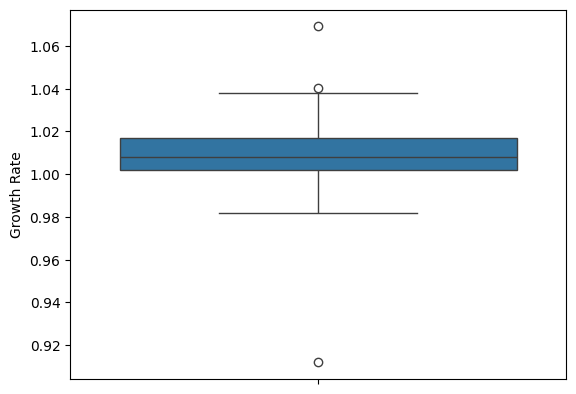

In [16]:
#checking for outliers
sns.boxplot(df['Growth Rate'])
plt.show()

In [35]:
#identifying outliers
# Calculate IQR for 'Growth Rate'
Q1 = df['Growth Rate'].quantile(0.25)
Q3 = df['Growth Rate'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
outliers = df[(df['Growth Rate'] < lower_bound) | (df['Growth Rate'] > upper_bound)]
outliers

,Rank,CCA3,Country/Territory,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,...,Population Growth 1970-2022,Density Ratio,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Country_Code,CCA3_code,Capital_code
133,135,MDA,Moldova,Chisinau,3272996,3084847,3277388,3678186,4251573,4480199,...,-11.806184,0.002857,False,True,False,False,False,133,130,51
164,37,POL,Poland,Warsaw,39857145,38428366,38553146,38597353,38504431,38064255,...,22.701767,0.000408,False,True,False,False,False,164,168,224
218,38,UKR,Ukraine,Kiev,39701739,43909666,44982564,45683020,48879755,51589817,...,-16.026847,0.000109,False,True,False,False,False,218,217,93


In [18]:
# Check if World Population Percentage sums to ~100%
print("Sum of World Population Percentage:", df['World Population Percentage'].sum())

# Check for negative or zero values in 'Growth Rate'
print(df[df['Growth Rate'] <= 0])

Sum of World Population Percentage: 99.93
Empty DataFrame
Columns: [Rank, CCA3, Country/Territory, Capital, Continent, 2022 Population, 2020 Population, 2015 Population, 2010 Population, 2000 Population, 1990 Population, 1980 Population, 1970 Population, Area (km²), Density (per km²), Growth Rate, World Population Percentage]
Index: []


Feature Engineering

In [32]:
# Calculate percentage growth from 2000 to 2022
df['Population Growth 2000-2022'] = ((df['2022 Population'] - df['2000 Population']) / df['2000 Population']) * 100

print(df[['Country/Territory', 'Population Growth 2000-2022']].head())

  Country/Territory  Population Growth 2000-2022
0       Afghanistan                   110.452893
1           Albania                   -10.675605
2           Algeria                    45.909920
3    American Samoa                   -23.968745
4           Andorra                    20.767962


In [21]:
# Calculate percentage growth from 1070 to 2000
df['Population Growth 1970-2000'] = ((df['2000 Population'] - df['1970 Population']) / df['1970 Population']) * 100

print(df[['Country/Territory', 'Population Growth 1970-2000']].head())

  Country/Territory  Population Growth 1970-2000
0       Afghanistan                    81.744952
1           Albania                    36.876955
2           Algeria                   123.070532
3    American Samoa                   115.069252
4           Andorra                   232.814703


In [22]:
# Calculate percentage growth from 1970 to 2022
df['Population Growth 1970-2022'] = ((df['2022 Population'] - df['1970 Population']) / df['1970 Population']) * 100

print(df[['Country/Territory', 'Population Growth 1970-2022']].head())

  Country/Territory  Population Growth 1970-2022
0       Afghanistan                   282.487510
1           Albania                    22.264511
2           Algeria                   225.482036
3    American Samoa                    63.519852
4           Andorra                   301.933535


In [23]:
# Normalize Density per km² using area
df['Density Ratio'] = df['Density (per km²)'] / df['Area (km²)']

print(df[['Density Ratio']].head())

   Density Ratio
0       0.000097
1       0.003439
2       0.000008
3       1.117977
4       0.364453


Encoding Categorical Data

In [26]:
# One-hot encoding for 'Continent' since it has small no of unique values
df = pd.get_dummies(df, columns=['Continent'], drop_first=True)

print(df.head())

   Rank CCA3 Country/Territory           Capital  2022 Population  \
0    36  AFG       Afghanistan             Kabul         41128771   
1   138  ALB           Albania            Tirana          2842321   
2    34  DZA           Algeria           Algiers         44903225   
3   213  ASM    American Samoa         Pago Pago            44273   
4   203  AND           Andorra  Andorra la Vella            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  ...  World Population Percentage  \
0         10694796  ...                         0.52   
1          3295066  ...           

In [28]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Country/Territories'
le = LabelEncoder()
df['Country_Code'] = le.fit_transform(df['Country/Territory'])

print(df[['Country/Territory', 'Country_Code']].head())

  Country/Territory  Country_Code
0       Afghanistan             0
1           Albania             1
2           Algeria             2
3    American Samoa             3
4           Andorra             4


In [33]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Country/Territories'
le = LabelEncoder()
df['CCA3_code'] = le.fit_transform(df['CCA3'])

print(df[['CCA3', 'CCA3_code']].head())

  CCA3  CCA3_code
0  AFG          1
1  ALB          4
2  DZA         57
3  ASM          9
4  AND          5


In [34]:
from sklearn.preprocessing import LabelEncoder

# Label encoding for 'Country/Territories'
le = LabelEncoder()
df['Capital_code'] = le.fit_transform(df['Capital'])

print(df[['Capital', 'Capital_code']].head())

            Capital  Capital_code
0             Kabul            89
1            Tirana           211
2           Algiers             4
3         Pago Pago           150
4  Andorra la Vella             8


In [29]:
df.columns

Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage', 'Population Growth 2000-2022',
       'Population Growth 1970-2000', 'Population Growth 1970-2022',
       'Density Ratio', 'Continent_Asia', 'Continent_Europe',
       'Continent_North America', 'Continent_Oceania',
       'Continent_South America', 'Country_Code'],
      dtype='object')

In [30]:
df.head()

,Rank,CCA3,Country/Territory,Capital,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,...,Population Growth 2000-2022,Population Growth 1970-2000,Population Growth 1970-2022,Density Ratio,Continent_Asia,Continent_Europe,Continent_North America,Continent_Oceania,Continent_South America,Country_Code
0,36,AFG,Afghanistan,Kabul,41128771,38972230,33753499,28189672,19542982,10694796,...,110.452893,81.744952,282.487510,0.000097,True,False,False,False,False,0
1,138,ALB,Albania,Tirana,2842321,2866849,2882481,2913399,3182021,3295066,...,-10.675605,36.876955,22.264511,0.003439,False,True,False,False,False,1
2,34,DZA,Algeria,Algiers,44903225,43451666,39543154,35856344,30774621,25518074,...,45.909920,123.070532,225.482036,0.000008,False,False,False,False,False,2
3,213,ASM,American Samoa,Pago Pago,44273,46189,51368,54849,58230,47818,...,-23.968745,115.069252,63.519852,1.117977,False,False,False,True,False,3
4,203,AND,Andorra,Andorra la Vella,79824,77700,71746,71519,66097,53569,...,20.767962,232.814703,301.933535,0.364453,False,True,False,False,False,4
